# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status()
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except requests.exceptions.RequestException as e:
        print("City not found. Skipping... Error: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | axim
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | sirte
Processing Record 5 of Set 1 | tamanrasset
Processing Record 6 of Set 1 | middletown
Processing Record 7 of Set 1 | keetmanshoop
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | vingt cinq
City not found. Skipping... Error: {e}
Processing Record 11 of Set 1 | mount pearl
Processing Record 12 of Set 1 | colonia
Processing Record 13 of Set 1 | smithers
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | lae
Processing Record 19 of Set 1 | mao
Processing Record 20 of Set 1 | nuuk
Processing Record 21 of Set 1 | lihue
Processing Record 22 of Set 1 | yellowknife

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,292.78,43,75,2.57,US,1686371015
1,axim,4.8699,-2.2405,298.49,85,85,3.68,GH,1686371015
2,ribeira grande,38.5167,-28.7000,291.36,78,14,4.02,PT,1686371015
3,sirte,31.2089,16.5887,295.07,62,77,4.47,LY,1686371015
4,tamanrasset,22.7850,5.5228,300.10,12,0,2.06,DZ,1686371016


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,292.78,43,75,2.57,US,1686371015
1,axim,4.8699,-2.2405,298.49,85,85,3.68,GH,1686371015
2,ribeira grande,38.5167,-28.7000,291.36,78,14,4.02,PT,1686371015
3,sirte,31.2089,16.5887,295.07,62,77,4.47,LY,1686371015
4,tamanrasset,22.7850,5.5228,300.10,12,0,2.06,DZ,1686371016


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

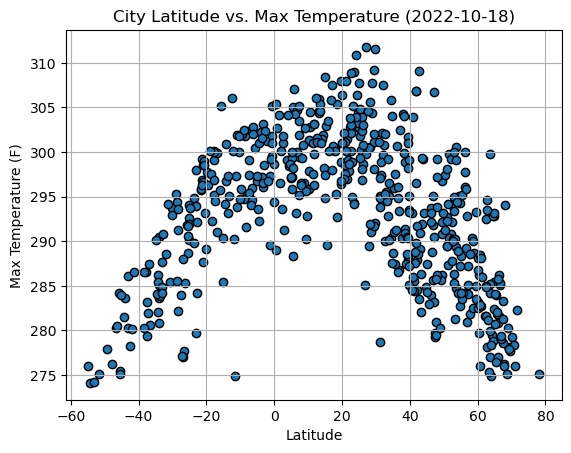

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black')

# Incorporate the other graph properties
# # Set the title and labels
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()

#### Latitude Vs. Humidity

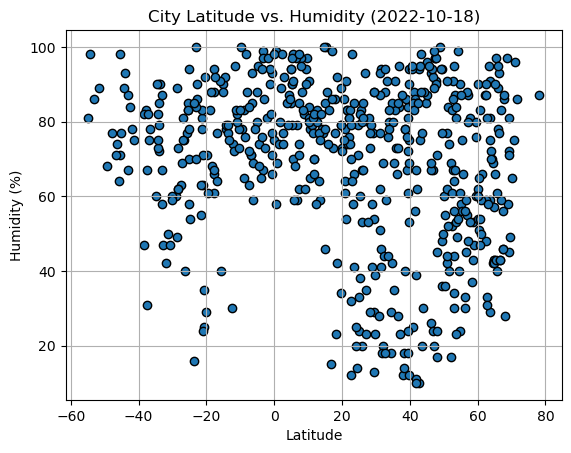

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black')

# Incorporate the other graph properties
# # Set the title and labels
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

#Display
plt.show()

#### Latitude Vs. Cloudiness

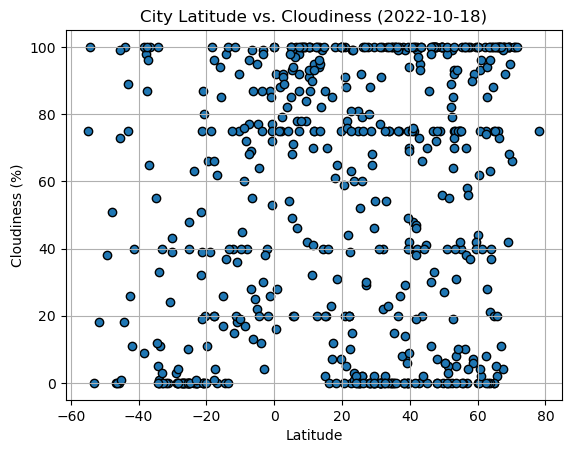

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black')

# Incorporate the other graph properties
# # Set the title and labels
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

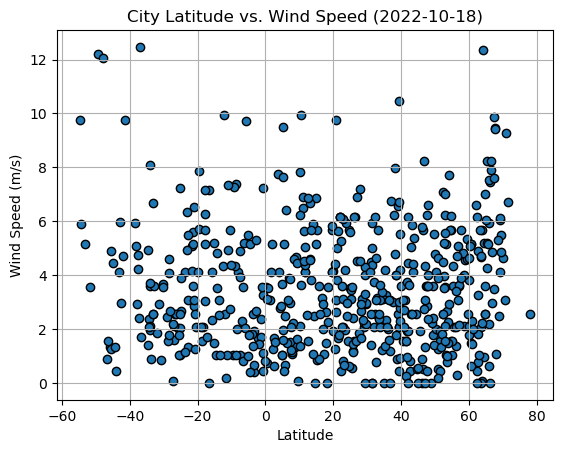

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black')

# Incorporate the other graph properties
# # Set the title and labels
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
    
    # Create the regression line
    regression_line = slope * x + intercept
    
    # Plot the data and the regression line
    plt.scatter(x, y)
    plt.plot(x, regression_line, color='red')
    
    # Set the title and labels
    plt.title('Linear Regression')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    # Display the correlation coefficient on the plot
    plt.text(0.05, 0.95, f'R-value: {rvalue:.2f}', transform=plt.gca().transAxes)

#Show the plot
plt.show()


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

#Display
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,292.78,43,75,2.57,US,1686371015
1,axim,4.8699,-2.2405,298.49,85,85,3.68,GH,1686371015
2,ribeira grande,38.5167,-28.7000,291.36,78,14,4.02,PT,1686371015
3,sirte,31.2089,16.5887,295.07,62,77,4.47,LY,1686371015
4,tamanrasset,22.7850,5.5228,300.10,12,0,2.06,DZ,1686371016


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,keetmanshoop,-26.5833,18.1333,277.66,75,0,2.57,NaN,1686371016
8,port elizabeth,-33.9180,25.5701,283.60,90,0,3.60,ZA,1686371016
12,alice springs,-23.7000,133.8833,294.90,16,0,4.12,AU,1686371017
13,waitangi,-43.9535,-176.5597,283.61,93,100,0.45,NZ,1686371017
15,atafu village,-8.5421,-172.5159,301.82,76,17,7.37,TK,1686371017


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.7085265497528662
The p-value is:2.7147806727542804e-63
The slope is:-0.30437471261074706
The std err is:0.015063826157520423
The intercept is:304.92682711003914


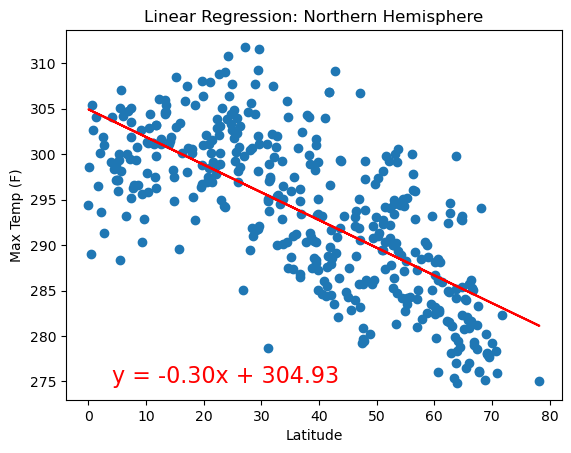

In [67]:
# Northern Hemisphere
# Extract the latitude and temperature data for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Linear Regression: Northern Hemisphere')

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min()+4, y_values.max()-35, equation, ha='left', va='top', fontsize=16,color='red')

# Display the plot
print(f"The r-value is:{rvalue}")
print(f"The p-value is:{pvalue}")
print(f"The slope is:{slope}")
print(f"The std err is:{stderr}")
print(f"The intercept is:{intercept}")
plt.show()


The r-value is: 0.7161472181434118


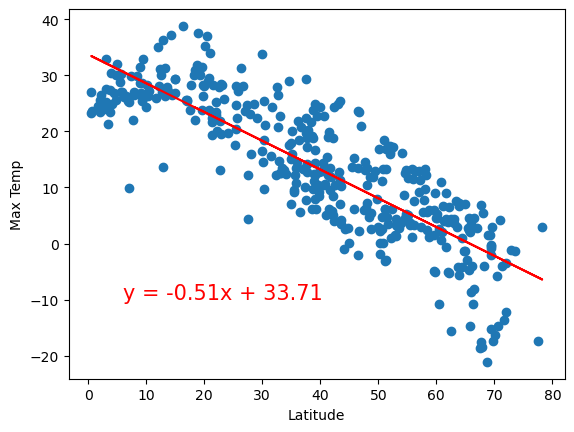

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is:0.8022698348296632
The p-value is:8.840693071746937e-37
The slope is:0.4612687493444702
The std err is:0.02748005778475298
The intercept is:301.7759226006372


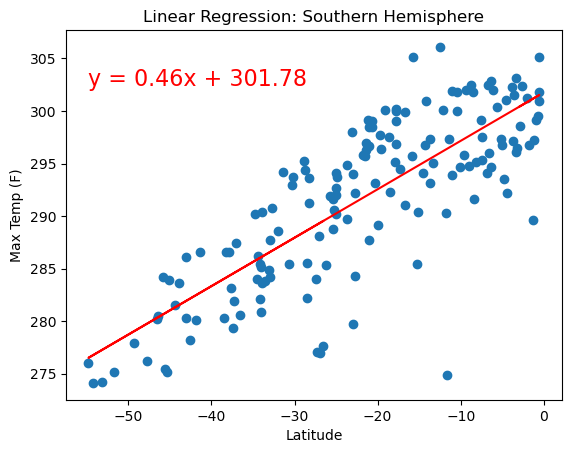

In [68]:
# Southern Hemisphere
# Extract the latitude and temperature data for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Linear Regression: Southern Hemisphere')

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min(), y_values.max()-2, equation, ha='left', va='top', fontsize=16,color='red')

# Display the plot
print(f"The r-value is:{rvalue}")
print(f"The p-value is:{pvalue}")
print(f"The slope is:{slope}")
print(f"The std err is:{stderr}")
print(f"The intercept is:{intercept}")
plt.show()


The r-value is: 0.4121057168607245


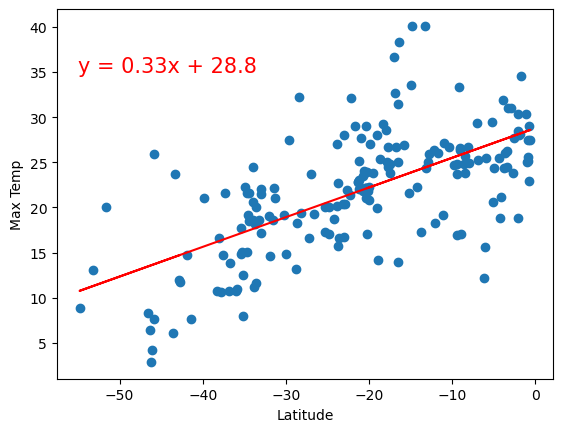

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** For the Northern Hemisphere, the r-value of -0.71 indicates a strong negative linear relationship between latitude and maximum temperature. This means that as latitude increases (moving towards the North Pole), the maximum temperature tends to decrease. The p-value being close to zero suggests that this relationship is statistically significant. The slope of -0.30 indicates that, on average, the maximum temperature decreases by approximately 0.30 degrees Fahrenheit for every one unit increase in latitude. The intercept of 304.93 represents the estimated maximum temperature at the latitude of 0.

Similarly, for the Southern Hemisphere, the r-value of 0.80 suggests a strong positive linear relationship between latitude and maximum temperature. As latitude increases (moving towards the South Pole), the maximum temperature tends to increase. The p-value being close to zero indicates the statistical significance of this relationship.The slope of 0.46 indicates that, on average, the maximum temperature increases by approximately 0.46 degrees Fahrenheit for every one unit increase in latitude. The intercept of 301.78 represents the estimated maximum temperature at the latitude of 0 in the Southern Hemisphere.

In summary, both the Northern and Southern Hemispheres show clear linear relationships between latitude and maximum temperature. The Northern Hemisphere exhibits a negative relationship, while the Southern Hemisphere demonstrates a positive relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:-0.1850768690194477
The p-value is:0.0001734873698753806
The slope is:-0.21833679718975757
The std err is:0.057607478059343686
The intercept is:75.23953405547795


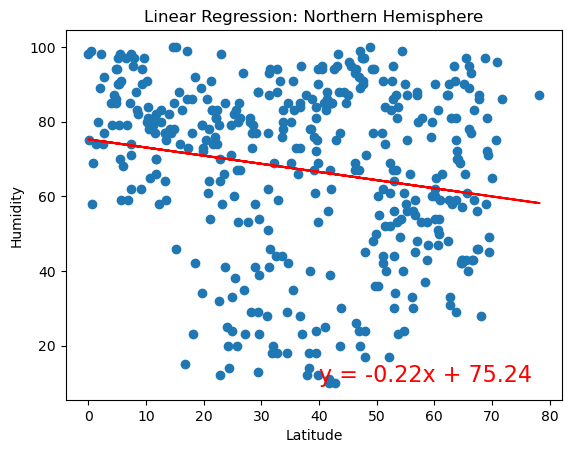

In [72]:
# Northern Hemisphere
# Extract the latitude and temperature data for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression: Northern Hemisphere')

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min()+40, y_values.max()-85, equation, ha='left', va='top', fontsize=16,color='red')

# Display the plot
print(f"The r-value is:{rvalue}")
print(f"The p-value is:{pvalue}")
print(f"The slope is:{slope}")
print(f"The std err is:{stderr}")
print(f"The intercept is:{intercept}")
plt.show()

The r-value is:0.10473730586223728
The p-value is:0.19030443251752474
The slope is:0.12400484509822314
The std err is:0.0942713465277459
The intercept is:77.15482066159436


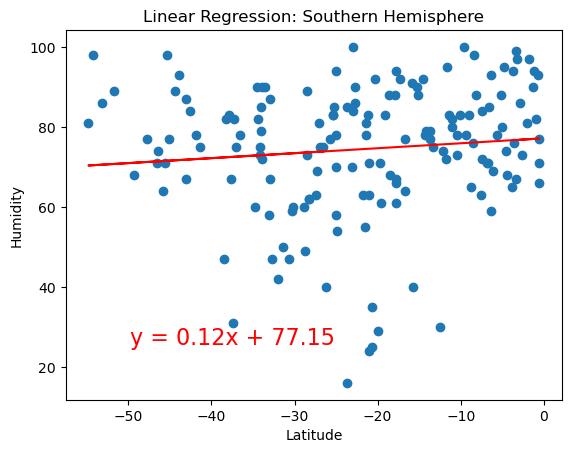

In [73]:
# Southern Hemisphere
# Extract the latitude and temperature data for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression: Southern Hemisphere')

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min()+5, y_values.max()-70, equation, ha='left', va='top', fontsize=16,color='red')

# Display the plot
print(f"The r-value is:{rvalue}")
print(f"The p-value is:{pvalue}")
print(f"The slope is:{slope}")
print(f"The std err is:{stderr}")
print(f"The intercept is:{intercept}")
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere, the r-value of -0.19 indicates a weak negative linear relationship between latitude and humidity. This means that there is a slight tendency for humidity to decrease as latitude increases, but the relationship is not very strong. The p-value being less than 0.05 suggests that the relationship is statistically significant. The slope of -0.22 suggests that, on average, humidity decreases by approximately 0.22 units for every one unit increase in latitude. The intercept of 75.24 represents the estimated humidity at the latitude of 0.

In the Southern Hemisphere, the r-value of 0.10 indicates a very weak positive linear relationship between latitude and humidity. This suggests that there is a slight tendency for humidity to increase as latitude increases in the Southern Hemisphere, but again, the relationship is not significant. The p-value being greater than 0.05 confirms the lack of statistical significance.The slope of 0.12 indicates that, on average, humidity increases by approximately 0.12 units for every one unit increase in latitude. The intercept of 77.15 represents the estimated humidity at the latitude of 0 in the Southern Hemisphere.

In summary, both the Northern and Southern Hemispheres show weak linear relationships between latitude and humidity, but the relationships are not very strong or significant. The Northern Hemisphere exhibits a slight negative relationship, while the Southern Hemisphere shows a slight positive relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:-0.046405975058878626
The p-value is:0.35039205502101534
The slope is:-0.09072061211729393
The std err is:0.09703679054998521
The intercept is:61.6857609186821


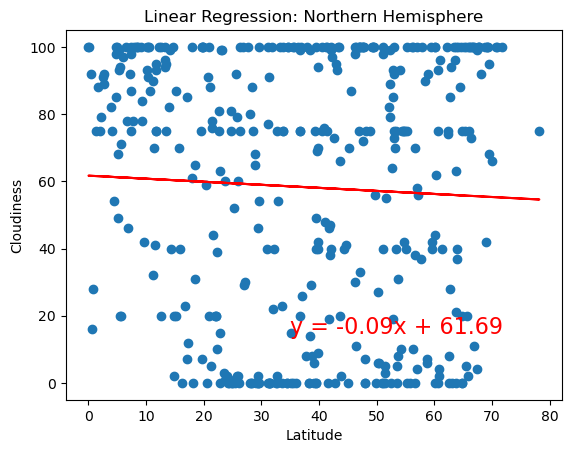

In [74]:
# Northern Hemisphere
# Extract the latitude and temperature data for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Northern Hemisphere')

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min()+35, y_values.max()-80, equation, ha='left', va='top', fontsize=16,color='red')

# Display the plot
print(f"The r-value is:{rvalue}")
print(f"The p-value is:{pvalue}")
print(f"The slope is:{slope}")
print(f"The std err is:{stderr}")
print(f"The intercept is:{intercept}")
plt.show()

The r-value is:0.18417683797548356
The p-value is:0.02052891578075325
The slope is:0.4798314811138226
The std err is:0.20502070521305024
The intercept is:49.63704511035416


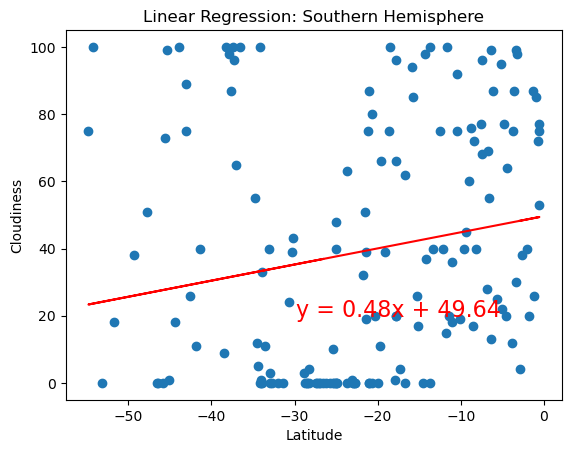

In [75]:
# Southern Hemisphere
# Extract the latitude and temperature data for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Southern Hemisphere')

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min()+25, y_values.max()-75, equation, ha='left', va='top', fontsize=16,color='red')

# Display the plot
print(f"The r-value is:{rvalue}")
print(f"The p-value is:{pvalue}")
print(f"The slope is:{slope}")
print(f"The std err is:{stderr}")
print(f"The intercept is:{intercept}")
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere, the r-value of -0.05 indicates a very weak negative linear relationship between latitude and cloudiness. This suggests that there is a slight tendency for cloudiness to decrease as latitude increases, but the relationship is not significant. The p-value being greater than 0.05 confirms the lack of statistical significance.The slope of -0.09 suggests that, on average, cloudiness decreases by approximately 0.09 units for every one unit increase in latitude. The intercept of 61.69 represents the estimated cloudiness at the latitude of 0.

In the Southern Hemisphere, the r-value of 0.18 indicates a weak positive linear relationship between latitude and cloudiness. This suggests that there is a slight tendency for cloudiness to increase as latitude increases in the Southern Hemisphere. The p-value being less than 0.05 suggests that the relationship is statistically significant.The slope of 0.48 indicates that, on average, cloudiness increases by approximately 0.48 units for every one unit increase in latitude. The intercept of 49.64 represents the estimated cloudiness at the latitude of 0 in the Southern Hemisphere.

In summary, the Northern Hemisphere shows a very weak negative relationship between latitude and cloudiness, while the Southern Hemisphere exhibits a weak positive relationship. However, the relationships are not very strong, with the Northern Hemisphere showing no statistical significance and the Southern Hemisphere showing only a slight significance.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.09850522596046901
The p-value is:0.04703460402616572
The slope is:0.011069458164809058
The std err is:0.005556767814585555
The intercept is:3.0076750534635326


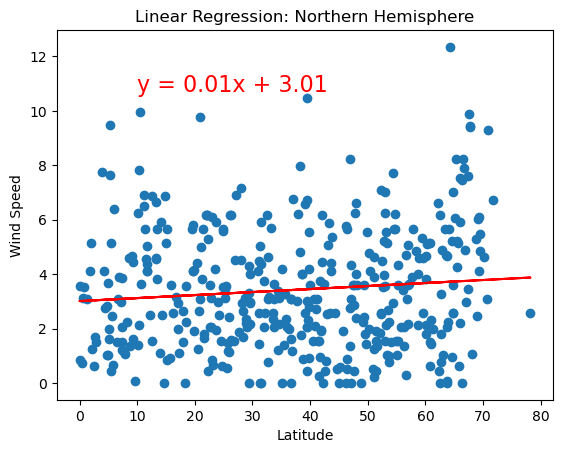

In [76]:
# Northern Hemisphere
# Extract the latitude and temperature data for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression: Northern Hemisphere')

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min()+10, y_values.max()-1, equation, ha='left', va='top', fontsize=16,color='red')

# Display the plot
print(f"The r-value is:{rvalue}")
print(f"The p-value is:{pvalue}")
print(f"The slope is:{slope}")
print(f"The std err is:{stderr}")
print(f"The intercept is:{intercept}")
plt.show()

The r-value is:-0.1976499657901575
The p-value is:0.012799423076738505
The slope is:-0.03527416504377239
The std err is:0.014006982654618718
The intercept is:2.7603275558424096


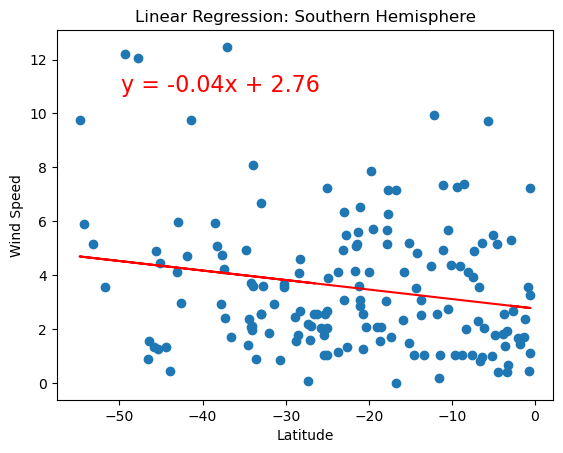

In [78]:
# Southern Hemisphere
# Extract the latitude and temperature data for the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression: Southern Hemisphere')

equation = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x_values.min()+5, y_values.max()-1, equation, ha='left', va='top', fontsize=16,color='red')

# Display the plot
print(f"The r-value is:{rvalue}")
print(f"The p-value is:{pvalue}")
print(f"The slope is:{slope}")
print(f"The std err is:{stderr}")
print(f"The intercept is:{intercept}")
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere, the r-value of 0.10 indicates a very weak positive linear relationship between latitude and wind speed. This suggests that there is a slight tendency for wind speed to increase as latitude increases in the Northern Hemisphere. The p-value being less than 0.05 suggests that the relationship is statistically significant, although the strength of the relationship is still very weak. The slope of 0.01 indicates that, on average, wind speed increases by approximately 0.01 units for every one unit increase in latitude. The intercept of 3.01 represents the estimated wind speed at the latitude of 0 in the Northern Hemisphere.

In the Southern Hemisphere, the r-value of -0.20 indicates a weak negative linear relationship between latitude and wind speed. This suggests that there is a slight tendency for wind speed to decrease as latitude increases in the Southern Hemisphere. The p-value being less than 0.05 suggests that the relationship is statistically significant. The slope of -0.04 indicates that, on average, wind speed decreases by approximately 0.04 units for every one unit increase in latitude. The intercept of 2.76 represents the estimated wind speed at the latitude of 0 in the Southern Hemisphere.

In summary, both the Northern Hemisphere and Southern Hemisphere exhibit weak linear relationships between latitude and wind speed. The Northern Hemisphere shows a very weak positive relationship, while the Southern Hemisphere shows a weak negative relationship. However, the relationships are not very strong, and the significance is relatively weak as well.